In [ ]:
# Random Forest

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training RMSE: 0.0083
Testing RMSE: 0.0183
Training MSE: 0.0001
Testing MSE: 0.0003
Training MAE: 0.0048
Testing MAE: 0.0114
Training R2: 0.9953
Testing R2: 0.9774


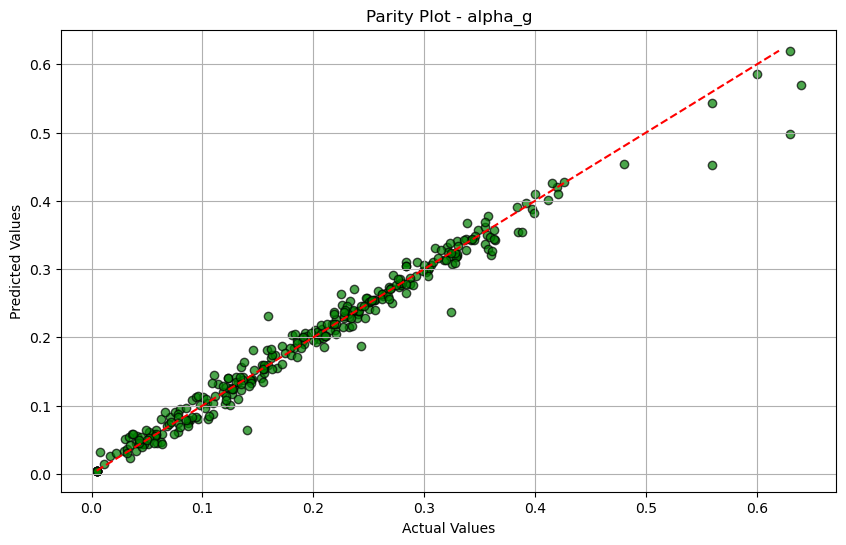

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('Supporting_data.xlsx', sheet_name='alpha')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the scaler for the output variable
scaler_z = MinMaxScaler()

# Fit the scaler on the training output data and transform both training and testing data
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Train a Random Forest model for the output variable (alpha_g)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = rf.predict(X_train_scaled)
z_test_pred_scaled = rf.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plots for the output in the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()


In [ ]:
# Dicision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('Supporting_data.xlsx', sheet_name='alpha')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_z = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = dt.predict(X_train_scaled)
z_test_pred_scaled = dt.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plot for the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()



In [ ]:
# Gradient Boosting

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Training RMSE: 0.0182
Testing RMSE: 0.0228
Training MSE: 0.0003
Testing MSE: 0.0005
Training MAE: 0.0126
Testing MAE: 0.0152
Training R2: 0.9776
Testing R2: 0.9651


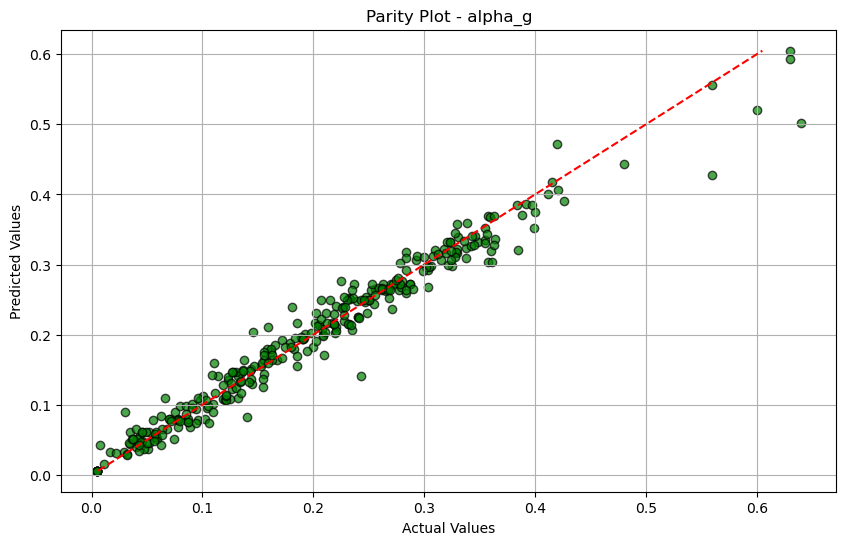

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('Supporting_data.xlsx', sheet_name='alpha')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the scaler for the output variable
scaler_z = MinMaxScaler()

# Fit the scaler on the training output data and transform both training and testing data
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = gb.predict(X_train_scaled)
z_test_pred_scaled = gb.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plots for the output in the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()


In [ ]:
# Extreme Gradient Boosting

Training RMSE: 0.0184
Testing RMSE: 0.0234
Training MSE: 0.0003
Testing MSE: 0.0005
Training MAE: 0.0128
Testing MAE: 0.0153
Training R2: 0.9770
Testing R2: 0.9629


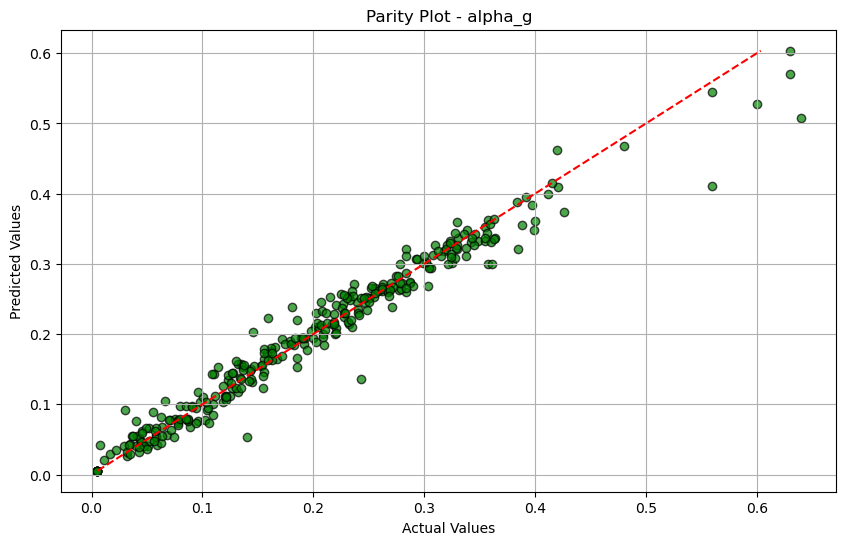

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('Supporting_data.xlsx', sheet_name='alpha')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the scaler for the output variable
scaler_z = MinMaxScaler()

# Fit the scaler on the training output data and transform both training and testing data
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the XGBoost model
xgb = XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = xgb.predict(X_train_scaled)
z_test_pred_scaled = xgb.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plots for the output in the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()
